# **실습 5 (선형대수 3)**
1. Install packages
2. Determinant
3. Change of basis
4. Least Square

선형대수 실습은, exercise 혹은 coding 문제풀이에 집중하기 보다는, 수업시간에 배웠던 개념들을 visualize 하면서 이를 폭넓게 이해하는 데에 초점을 맞추고 있습니다. 실습에서 사용한 예시 외에도, 다양한 matrix들을 visualize 하면서 개념을 익혀보시기 바랍니다.

# 1. Install packages

> 필요한 package를 설치하고 import합니다

In [1]:
# visualization을 위한 helper code입니다.
from urllib.request import urlretrieve
URL = 'https://go.gwu.edu/engcomp4plot'
urlretrieve(URL, 'plot_helper.py')

import sys
sys.path.append('../scripts/')

# 다음 세 custom function (1)plot_vector, (2)plot_linear_transformation, (3) plot_linear_transformations
# 을 사용할 것입니다.
from plot_helper import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy

sy.init_printing()
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
def plotVectors(vecs, colors, alpha=1):
    """
    Determinant 섹션의 plot에 사용하기 위한 custom function입니다.

    Parameters
    ----------
    vecs : plot할 vector(numpy array)의 list  (e.g., [[1, 3], [2, 2]] )
    colors : 각 vector의 color  (e.g., ['red', 'blue'])
    alpha : 투명도

    Returns
    -------
    fig : figure
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]], angles='xy',
                   scale_units='xy', scale=1, color=colors[i],alpha=alpha_i)

# 2. Determinant

> 강의에서는 간략하게 다루고 넘어간 determinant에 대해 좀더 알아보겠습니다. 저번 수업 및 실습에서 배웠듯, matrix는 linear transformation으로 생각할 수 있습니다. Determinant는, 이러한 transformation이 일어날 때, "multiplicative change"가 일어나는 정도" 라고 생각할 수 있습니다. Multiplicative change는 크게 두 가지를 생각하면 됩니다: (1) 어떠한 input이 matrix $A$를 통과하게 되면 "부피(volume)"가 얼마나 변하는가, (2) 어떠한 input이 matrix $A$를 통과하게 되면 "방향(orientation)"이 변하는가. 두 성질에 대해 각각 알아보겠습니다.

<center>
<img src="https://github.com/akhilvasvani/Linear-Algebra-Basics/raw/6d4f0bd887d7b2c51fb0e95ad4f0659513631697/Chapters/2.11%20The%20Determinant/images/unit-square-area.png
"> <figcaption> 출처: Ref. [1]</figcaption>
</center>

### Example 1

> 위 그림은 $\mathbf{i}, \mathbf{j}$로 이루어진 unit cube 입니다. $\mathbf{i}, \mathbf{j}$가 각각 길이가 1이므로, 넓이도 1임을 알 수 있습니다.

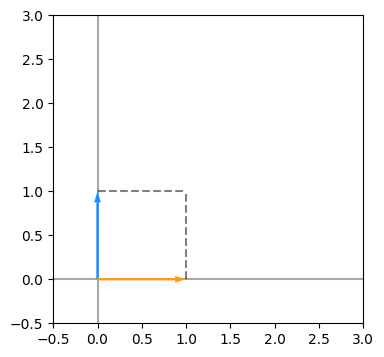

In [4]:
orange = '#FF9A13'
blue = '#1190FF'

i = [0, 1]
j = [1, 0]

fig = plt.figure(figsize = (4,4))
plotVectors([i, j], [[blue], [orange]], alpha=1)
plt.plot([0, 1], [1, 1], ls = '--', color = 'black', alpha = .5)
plt.plot([1, 1], [0, 1], ls = '--', color = 'black', alpha = .5)

plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.show()

> 이제 위 vector를 matrix $A = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$에 통과시켜 보겠습니다.

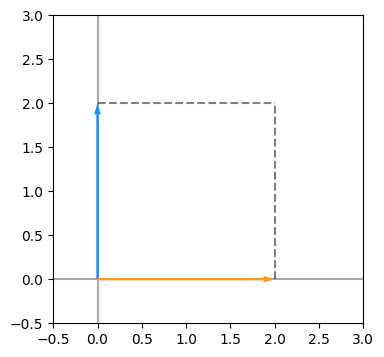

In [5]:
A = np.array([[2, 0], [0, 2]])

new_i = A.dot(i)
new_j = A.dot(j)

fig = plt.figure(figsize = (4,4))
plotVectors([new_i, new_j], [[blue], [orange]])
plt.plot([0, 2], [2, 2], ls = '--', color = 'black', alpha = .5)
plt.plot([2, 2], [0, 2], ls = '--', color = 'black', alpha = .5)

plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.show()

> 예상하셨겠지만, $A$는 diagonal matrix이기 때문에 $\mathbf{i}, \mathbf{j}$ 를 각각 2배로 rescale 함을 알 수 있습니다 ($\mathbf{i,j} \rightarrow \mathbf{2i,2j}$). 따라서 주황색, 파랑색 vector는 rotate, reflection 등이 없이 각자 2배 길어지는 것이 전부입니다. 따라서 넓이는 4(사각형 넓이 = 밑변 * 높이)가 됐습니다. 이제 determinant를 계산해봅시다.

In [6]:
np.linalg.det(A)

4.0

> 넓이가 1에서 4, 즉 volume 4배가 됐는데 이는 $A$의 determinant와 일치함을 알 수 있습니다.

### Example 2

이제 두 번째 성질, 방향(orientation)에 대해 알아보겠습니다. 이번 예시에선 $\mathbf{i}, \mathbf{j}$로 이루어진 unit cube에 $B = \begin{bmatrix} -2 & 0 \\ 0 & 2 \end{bmatrix}$를 통과시켜 보겠습니다.

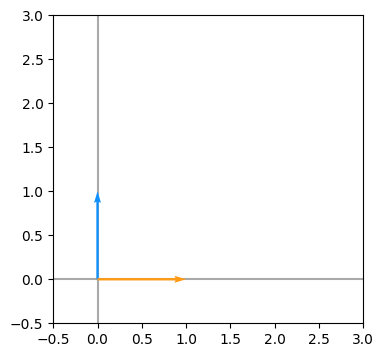

In [7]:
orange = '#FF9A13'
blue = '#1190FF'

i = [0, 1]
j = [1, 0]

fig = plt.figure(figsize = (4,4))
plotVectors([i, j], [[blue], [orange]])
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.show()

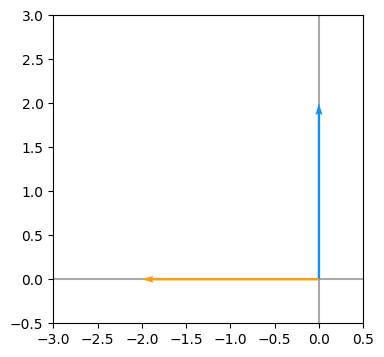

In [8]:
B = np.array([[-2, 0], [0, 2]])
new_i_1 = B.dot(i)
new_j_1 = B.dot(j)

fig = plt.figure(figsize = (4,4))
plotVectors([new_i_1, new_j_1], [['#1190FF'], ['#FF9A13']])
plt.xlim(-3, 0.5)
plt.ylim(-0.5, 3)
plt.show()

> 이번에도 각 주황색, 파랑색 vector의 길이가 2배가 됐음은 동일합니다. 따라서 determinant의 절대값은 4가 나와야 합니다.

In [9]:
np.linalg.det(B)

-4.0

> 절대값이 4이긴 하지만, 앞에 - 부호가 붙어있음을 알 수 있습니다. 이는 방향(orientation)을 보존하지 못했다는 의미입니다.

<center>
<img src="https://github.com/akhilvasvani/Linear-Algebra-Basics/raw/6d4f0bd887d7b2c51fb0e95ad4f0659513631697/Chapters/2.11%20The%20Determinant/images/positive-negative-determinant.png
"> <figcaption> 출처: Ref. [1]</figcaption>
</center>

> 좌측 그림의 경우, 회전 혹은 길이의 조절을 통해서 변환이 가능한 경우입니다. 하지만 우측 그림의 경우, 오른쪽 h를 회전하거나 길이를 조정한다고 해서 왼쪽 h를 얻을 수 없고, reflection이 필요합니다. 이에 대해 더 구체적인 내용은, 다음 wiki(https://en.wikipedia.org/wiki/Determinant) 를 참조하시기 바랍니다.

> 이와 같이, determinant의 절대값은 크기(volume)가 변화하는 정도, 부호는 방향(orientation)의 변화 여부를 알려줍니다.

### Exercise

> 어떤 matrix의 determinant가 0일 경우, 해당 matrix는 invertible하지 않습니다. 위의 "multiplicative change"로 해석했을 때, 이는 어떤 의미일까요?


예를들어, 2x2 matrix $A$의 rank가 1일 경우, column space는 1-dimensional subspace일 것입니다. 이 말은, input 2-dimensional $R^2$가 $A$를 거치면서 1-dimensional subspace로 squish된다는 것을 의미합니다.

즉 위의 길이가 1인 정사각형 예시로 따지자면, $A$를 거친 이후에 높이가 0이 된다고 생각할 수 있습니다 (2차원 짜리 사각형이 1차원 직선이 됐으니까). 따라서 넓이가 $1 \rightarrow 0$이 됐으니까 determinant는 0이 됩니다.

이 설명으로부터 non-invertible에 대해 이해해볼 수 있습니다. $A$를 **함수**라고 생각해본다면, single input에 대해 single output이 나와야 합니다. 그런데 $A$의 역행렬은, 1-dimensional subspace를 2-dimensional $R^2$로 복원해야 하는데, 즉 sinlge input에 대해 multiple output이 나와야 하므로, $A^{-1}$라는  function이 존재할 수 없는 것입니다.

# Change of basis

> 저번 실습 시간에 basis를 배웠고, change of basis도 간략하게 다뤘습니다. "왜 change of basis를 해야하는가?"에 대한 대답은 eigen decomposition 시간에 자세히 알아보기로 하고, 오늘은 이를 하는 방법에 대해 예시를 들어 알아보겠습니다.

> 모든 vector는 basis vector의 linear combination으로 표현할 수 있습니다. 예를 들어, 다음과 같은 vector $v = \begin{bmatrix}-3\\0\end{bmatrix}$를 $R^2$의 basis $\Big\{ \mathbf{a} = \begin{bmatrix}2\\1\end{bmatrix}$, $\mathbf{b} = \begin{bmatrix}1\\2\end{bmatrix} \Big\}$의 linear combination으로 나타내고 싶다고 합시다.

In [10]:
C = np.array([[2,1],[1,2]])  # 각 column이 a,b인 행렬

> 이전 실습에서 배웠던것처럼, 같은 vector는 basis를 어떻게 잡냐에 따라 다른 좌표를 갖게 됩니다. Standard basis를 사용한다면 ($\Big\{\mathbf{i}, \mathbf{j}\Big\}$), vector $v$의 좌표는 (-3,0)이 될 것입니다. 저희가 궁금한 것은, basis basis $\Big\{ \mathbf{a} = \begin{bmatrix}2\\1\end{bmatrix}$, $\mathbf{b} = \begin{bmatrix}1\\2\end{bmatrix} \Big\}$를 사용했을 때의 좌표입니다. 즉,

$$Cx = v $$
<h3 align=center> (component 1의 좌표 * $[2,1]^T$) + (component 2의 좌표 * $[1,2]^T$) = v</h3>

> 를 만족하는 x를 찾고 싶은 것입니다.

In [11]:
v = np.array([-3,0])
x = np.linalg.solve(C, v)  # numpy의 solve 함수를 이용해서도 Ax=b의 해를 구할 수 있습니다
x

array([-2.,  1.])

> Vector $v$는, $\Big\{ \mathbf{a}, \mathbf{b} \Big\}$의 basis에서 좌표가 (-2,1)이 됨을 알 수 있습니다.

> 이를 visualize 해봅시다.

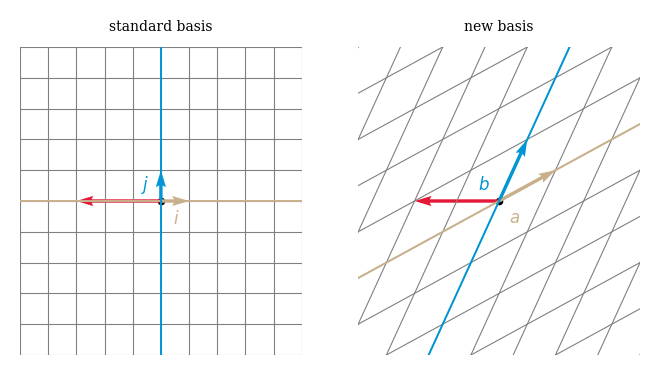

In [12]:
a = np.array([2,1])
b = np.array([1,2])
plot_change_basis (a, b, v)  # standard basis에서 {a,b} basis로 바꿔주는 custom function 입니다.

> 빨간색 vector는 $v$,  갈색 vector는 $i$와 $a$,  파란색 vector는 $j$와 $b$ 입니다. 왼쪽 plot에선, $v$는 -3*$\mathbf{i}$ + 0*$\mathbf{j}$임을 알 수 있고, 따라서 좌표가 (-3,0)이 됩니다 (저희가 일반적으로 알고 있는 standard basis에서의 좌표입니다). 오른쪽 plot에선, **같은 vector $v$**가, -2*$\mathbf{a}$ + 1*$\mathbf{b}$로 표현됨을 알 수 있고, 따라서 좌표가 (-2,1)이 됩니다.

* New basis로 삼을 $\mathbf{a}, \mathbf{b}$를 각 column으로 하는 matrix $C$는, $\Big\{ \mathbf{a}, \mathbf{b} \Big\}$ basis에서의 좌표 $x$를 $\rightarrow$ standard basis $\Big\{ \mathbf{i}, \mathbf{j} \Big\}$에서의 좌표 $v$로 변환해주는 matrix이다 ($Cx = v$, 즉 x는 {a,b}의 좌표, v는 {i,j}의 좌표).

> 그럼 반대로, $\Big\{\mathbf{i}, \mathbf{j}\Big\}$의 좌표를 $\Big\{\mathbf{a}, \mathbf{b}\Big\}$의 좌표로 변환시키려면 어떤 matrix를 곱하면 될까요? 당연하게도, $C^{-1}$임을 알 수 있습니다.

$$ x = C^{-1}v$$

> 하나만 더 나아가 생각해봅시다. 만약 우리가 어떤 vector를 standard basis 상에서(즉 왼쪽 plot에서) $x$를 반시계 방향으로 90도 회전하고 싶은데, $x$의 $\Big\{\mathbf{a}, \mathbf{b}\Big\}$에서의 좌표 (즉 오른쪽 plot에서의 좌표) 만이 주어져 있다고 합시다. 그러면 어떻게 해야 할까요?

> 이를 계산하기 위해선, 다음과 같은 단계를 거쳐야 합니다.


1.   $\Big\{\mathbf{a}, \mathbf{b}\Big\}$의 좌표를 $\Big\{\mathbf{i}, \mathbf{j}\Big\}$로 바꾼다 (change basis: $C$).
2.   $\Big\{\mathbf{i}, \mathbf{j}\Big\}$ 상에서 반시계 방향으로 90도 회전을 한다 (linear transformation: $R$).
3.   다시 $\Big\{\mathbf{i}, \mathbf{j}\Big\}$의 좌표를 $\Big\{\mathbf{a}, \mathbf{b}\Big\}$의 좌표로 옮긴다 (change basis: $C^{-1}$) .

> 이 셋을 연달아 수행하게 되면, $\Big\{\mathbf{a}, \mathbf{b}\Big\}$ basis에서의 linearly transformed 된 좌표를 얻을 수 있게 됩니다.

$$ \text{새로운 좌표} = C^{-1}RCx$$



In [13]:
x = np.array([-2, 1])

# 1
x_1 = C@x
print('1. x_ij:',x_1)

# 2
R = np.array([[0,-1],[1,0]])
x_2 = R@x_1
print('2. rotated_x_ij:',x_2)

# 3
C_inv = np.linalg.inv(C)
x_3 = C_inv@x_2
print('3: rotated_x_ab:', x_3)

1. x_ij: [-3  0]
2. rotated_x_ij: [ 0 -3]
3: rotated_x_ab: [ 1. -2.]


### Exercise

$\Big\{\mathbf{a}, \mathbf{b}\Big\}$ basis에서 좌표가 (-7, 11)인 vector $v$가 있습니다. $v$에 대해 $\Big\{\mathbf{i}, \mathbf{j}\Big\}$ 상에서 $T = \begin{bmatrix} 3 & 5 \\ 2 & 11 \end{bmatrix}$로 표현되는 linear transformation을 적용했을 때, 변환된 좌표를 구하시오. ($\mathbf{a}, \mathbf{b}$는 위 예시와 같습니다)

In [14]:
C

array([[2, 1],
       [1, 2]])

In [15]:
#answer

T = np.array([[3,5],[2,11]])

v = np.array([-7, 11])

# 1. i,j 좌표계로 바꾼다
v_1 = C@v
print(v_1)

#2. i,j 좌표계에서 T를 수행한다
v_2 = T@v_1
print(v_2)

#3. a,b 좌표계로 다시 되돌린다
v_3 = C_inv@v_2
print(v_3)

[-3 15]
[ 66 159]
[-9. 84.]


In [16]:
C_inv@T@C@v

array([-9., 84.])

### Exercise

$\Big\{\mathbf{i}, \mathbf{j}\Big\}$ basis에서 좌표가 (-7, 11)인 vector $v$가 있습니다. $v$에 대해 $\Big\{\mathbf{a}, \mathbf{b}\Big\}$ 상에서 $T = \begin{bmatrix} 3 & 5 \\ 2 & 11 \end{bmatrix}$로 표현되는 linear transformation을 적용했을 때, 변환된 좌표를 구하시오. ($\mathbf{a}, \mathbf{b}$는 위 예시와 같습니다)

In [17]:
#answer

T = np.array([[3,5],[2,11]])

v = np.array([-7, 11])

# 1. a,b 좌표계로 바꾼다
v_1 = C_inv@v
print(v_1)

#2. a,b 좌표계에서 T를 수행한다
v_2 = T@v_1
print(v_2)

#3. i,j 좌표계로 다시 되돌린다
v_3 = C@v_2
print(v_3)

[-8.333  9.667]
[23.333 89.667]
[136.333 202.667]


In [18]:
C@T@C_inv@v

array([136.333, 202.667])

# Least square

> 강의에서 배웠듯, least square 문제는 $Ax = b$의 해가 존재하지 않을 때, 그나마 $Ax$의 값이 $b$와 가장 가까운 (i.e., 둘 사이의 L2 norm을 가장 작게 하는) $x$를 찾으려고 하는 것입니다.

$$
Ax = \hat{y} \approx b \\
\begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \\ a_{41} & a_{42} & a_{43} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = \begin{bmatrix} \hat{y_1} \\ \hat{y_2} \\ \hat{y_3} \\ \hat{y_4} \end{bmatrix} \approx  \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ b_4 \end{bmatrix}
$$

> 구체적으로는, Error $E = ||b-Ax||^2_2 = ||b-\hat{y}||^2_2$를 minimize하는 x를 찾는 문제가 least square 문제입니다. 강의 및 실습에서 배웠듯, $b$가 $A$의 column space에 존재한다면 $E = 0$을 만드는 $x$가 존재할 것입니다. 만약 $b$가 $A$의 column space 밖에 있다면, $E$는 0보다 크게 됩니다.

> 강의의 geometric interpretation of least square에서 알 수 있듯, 해당 $x$는

$$A^T(b - A\hat{x}) = 0 \\
A^TA\hat{x} = A^Tb$$

> 으로 구할 수 있습니다. 만약 $A^TA$가 invertible 하다면, $x = (A^TA)^{-1}A^Tb$ 로 구할 수 있습니다.

# 4. Least square practice

> 다음과 같은 data가 있다고 합시다. 몸무게, 키, 흡연 여부로 life-span을 맞추는 문제입니다.

* data = $\begin{array}{ccc}
& Weight & Height & Is \; smoking & Life-span\\
Person 1 & 60 & 177 & 1(=yes) & 66\\
Person 2 & 65 & 170 & 0(=no) & 74\\
Person 3 & 55 & 175 & 0 & 78\\
Person 4 & 70 & 180 & 1 & 72\\
Person 5 & 45 & 155 & 1 & 70 \\
Person 5 & 50 & 160 & 0 & 80
\end{array}$


> Least square를 이용해서 $E$를 최소화하는 x를 구해봅시다.

### Exercise

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

<ipython-input-19-f7c2a1bc9667>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [20]:
b = np.array([66,74,78,72, 70,80])

# (1) Weight만 사용해서 life-span을 예측해봅시다.

A_1 = np.array([60,65,55,70,45,50]).reshape(6,1)
x_1 = np.dot((np.dot(np.linalg.inv(np.dot(A_1.T,A_1)),A_1.T)),b)
error_1 = ((A_1@x_1 - b)**2).sum()

# (2) Weight, Height 2개를 이용해 life-span을 예측해봅시다.

A_2 = np.array([[60,177],[65,170],[55,175],[70,180],[45,155],[50,160]])
x_2 = np.dot((np.dot(np.linalg.inv(np.dot(A_2.T,A_2)),A_2.T)),b)
error_2 = ((A_2@x_2 - b)**2).sum()

# (2) Weight, Height, Is smoking 모두 사용해서 life-span을 예측해봅시다.

A_3 = np.array([[60,177,1],[65,170,0],[55,175,0],[70,180,1],[45,155,1],[50,160,0]])
x_3 = np.dot((np.dot(np.linalg.inv(np.dot(A_3.T,A_3)),A_3.T)),b)
error_3 = ((A_3@x_3 - b)**2).sum()

print("error_1: %.4f, error_2: %.4f, error_3: %.4f"%(error_1, error_2, error_3))

error_1: 954.2540, error_2: 205.7798, error_3: 102.9521


> 위 코드를 완성시키고, 왜 error에 차이가 나는지 생각해봅시다.

> life-span을 맞추는데 도움이 되는 정보를 더 많이 사용할수록, 예측의 정확도가 올라간다.


>Quiz 1처럼 우리가 배운 식을 이용해 구할 수도 있지만, 이미 만들어진 함수들을 활용할 수도 있습니다.

### Exercise

> 2-1) Use np.linalg.lstsq (https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)

In [21]:
A = A_3
x_4 = np.linalg.lstsq(A,b,rcond=None)
error_4 = ((A@x_4[0] - b)**2).sum()
error_4

102.9521467249508

> 2-2) Use optimize.curve_fit from scipy (https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.optimize.curve_fit.html?highlight=curve_fit#scipy.optimize.curve_fit)

In [22]:
from scipy import optimize

# 주의: 이 방식은 속도 등을 고려하지 않은, 예시 코드입니다.
def func(data, x_1, x_2, x_3):
  return data[0]*x_1 + data[1]*x_2 + data[2]*x_3

In [23]:
weight = []
height = []
smoke = []
for item in A:
  weight.append(item[0])
  height.append(item[1])
  smoke.append(item[2])

In [24]:
x_5 = optimize.curve_fit(func, xdata = [weight,height,smoke], ydata = list(b))[0]

In [25]:
error_5 = ((A@x_5 - b)**2).sum()
error_5

102.95214672495048

# Reference

1. https://github.com/akhilvasvani/Linear-Algebra-Basics
2. https://github.com/jclosure/EngComp4_landlinear

3. https://github.com/MacroAnalyst/Linear_Algebra_With_Python



